In [23]:
%autoreload 2
import os
import pandas as pd
from tqdm import tqdm
from rsa_wrapper import rsa_wrapper
from vis_utils import load_up_result_by_task, create_figure_for_dataset



In [2]:
path = "./outputs"
os.makedirs(path, exist_ok=True)
path = "./outputs/split_halves"
os.makedirs(path, exist_ok=True)

# Run Nearest Neighbors and AnnaK intersubject RSA

this code produces a file in `outputs` with the results for each task

In [3]:
hbn_tasks = ['listsort', 'flanker','towre', 'cbcl','srs']

for task in tqdm(hbn_tasks):
    for fn in [ 'annak','nn']:  
            # Running the RSA using a mantel tests with 10k permutations 
            rsa_wrapper(ds='hbn',
                        task=task,
                        run='movieDM',
                        function=fn,
                        n_perms= 10000,
                        use_motion_control=True,
                        use_controls=True,
                        run_split_half=False)
            # Running the same as above, but split-half, to check out consistency across halves
            # If you don't care about consistency and just want the actual results,
            # This can next part can be commented out
            # Only using 2 perms since for this we just care about the r-vals, not p-vals
            rsa_wrapper(ds='hbn',
                        task=task,
                        run='movieDM',
                        function=fn,
                        n_perms= 2,
                        use_motion_control=True,
                        use_controls=True,
                        run_split_half=True)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

len subs 409
saving to:  outputs//out_hbn_movieDM_listsort_annak_10000_control.csv
len subs 409
saving to:  outputs//out_hbn_movieDM_listsort_nn_10000_control.csv


 20%|████████▊                                   | 1/5 [13:59<55:57, 839.37s/it]

len subs 409
saving to:  outputs//out_hbn_movieDM_flanker_annak_10000_control.csv
len subs 409
saving to:  outputs//out_hbn_movieDM_flanker_nn_10000_control.csv


 40%|█████████████████▌                          | 2/5 [28:21<42:37, 852.53s/it]

len subs 409
saving to:  outputs//out_hbn_movieDM_towre_annak_10000_control.csv
len subs 409
saving to:  outputs//out_hbn_movieDM_towre_nn_10000_control.csv


 60%|██████████████████████████▍                 | 3/5 [42:32<28:24, 852.15s/it]

len subs 409
saving to:  outputs//out_hbn_movieDM_cbcl_annak_10000_control.csv
len subs 409
saving to:  outputs//out_hbn_movieDM_cbcl_nn_10000_control.csv


 80%|███████████████████████████████████▏        | 4/5 [56:14<13:59, 839.95s/it]

len subs 409
saving to:  outputs//out_hbn_movieDM_srs_annak_10000_control.csv
len subs 409
saving to:  outputs//out_hbn_movieDM_srs_nn_10000_control.csv


100%|██████████████████████████████████████████| 5/5 [1:10:25<00:00, 845.14s/it]


# Check out one of the outputs files

This file has the AnnaK model outputs for the flanker task in the HBN dataset.

The first column is the node (0-267).

The r_val and p_val are the correlation and p-value we got for this node from the mantel test.

In [27]:
o = pd.read_csv(f'outputs/out_hbn_movieDM_flanker_annak_10000_control.csv')
o.head()

,Unnamed: 0,r_val,p_val,null_r_vals,run,task,function,n_perms,use_controls,simtype,dataset
0,0,0.028433,0.0078,"[0.02843305882665921, -0.0003769987989755487, ...",movieDM,flanker,annak,10000,True,isc,hbn
1,1,0.023068,0.0333,"[0.0230677962784899, 0.01482255190349021, -0.0...",movieDM,flanker,annak,10000,True,isc,hbn
2,2,0.029415,0.0591,"[0.029415374292261643, 0.01669301514319834, -0...",movieDM,flanker,annak,10000,True,isc,hbn
3,3,0.006134,0.6248,"[0.006134425485179969, -0.009408407013524418, ...",movieDM,flanker,annak,10000,True,isc,hbn
4,4,0.013815,0.3598,"[0.013815498207800921, 0.009825659573738049, -...",movieDM,flanker,annak,10000,True,isc,hbn


# Visualize the results

Note -- if you run this with the files in outputs folder already included the repo you will see the viz below.

But if you run rsa_wrapper above (which uses the fake data included in `hbn_behav.csv`) ou will see different plots

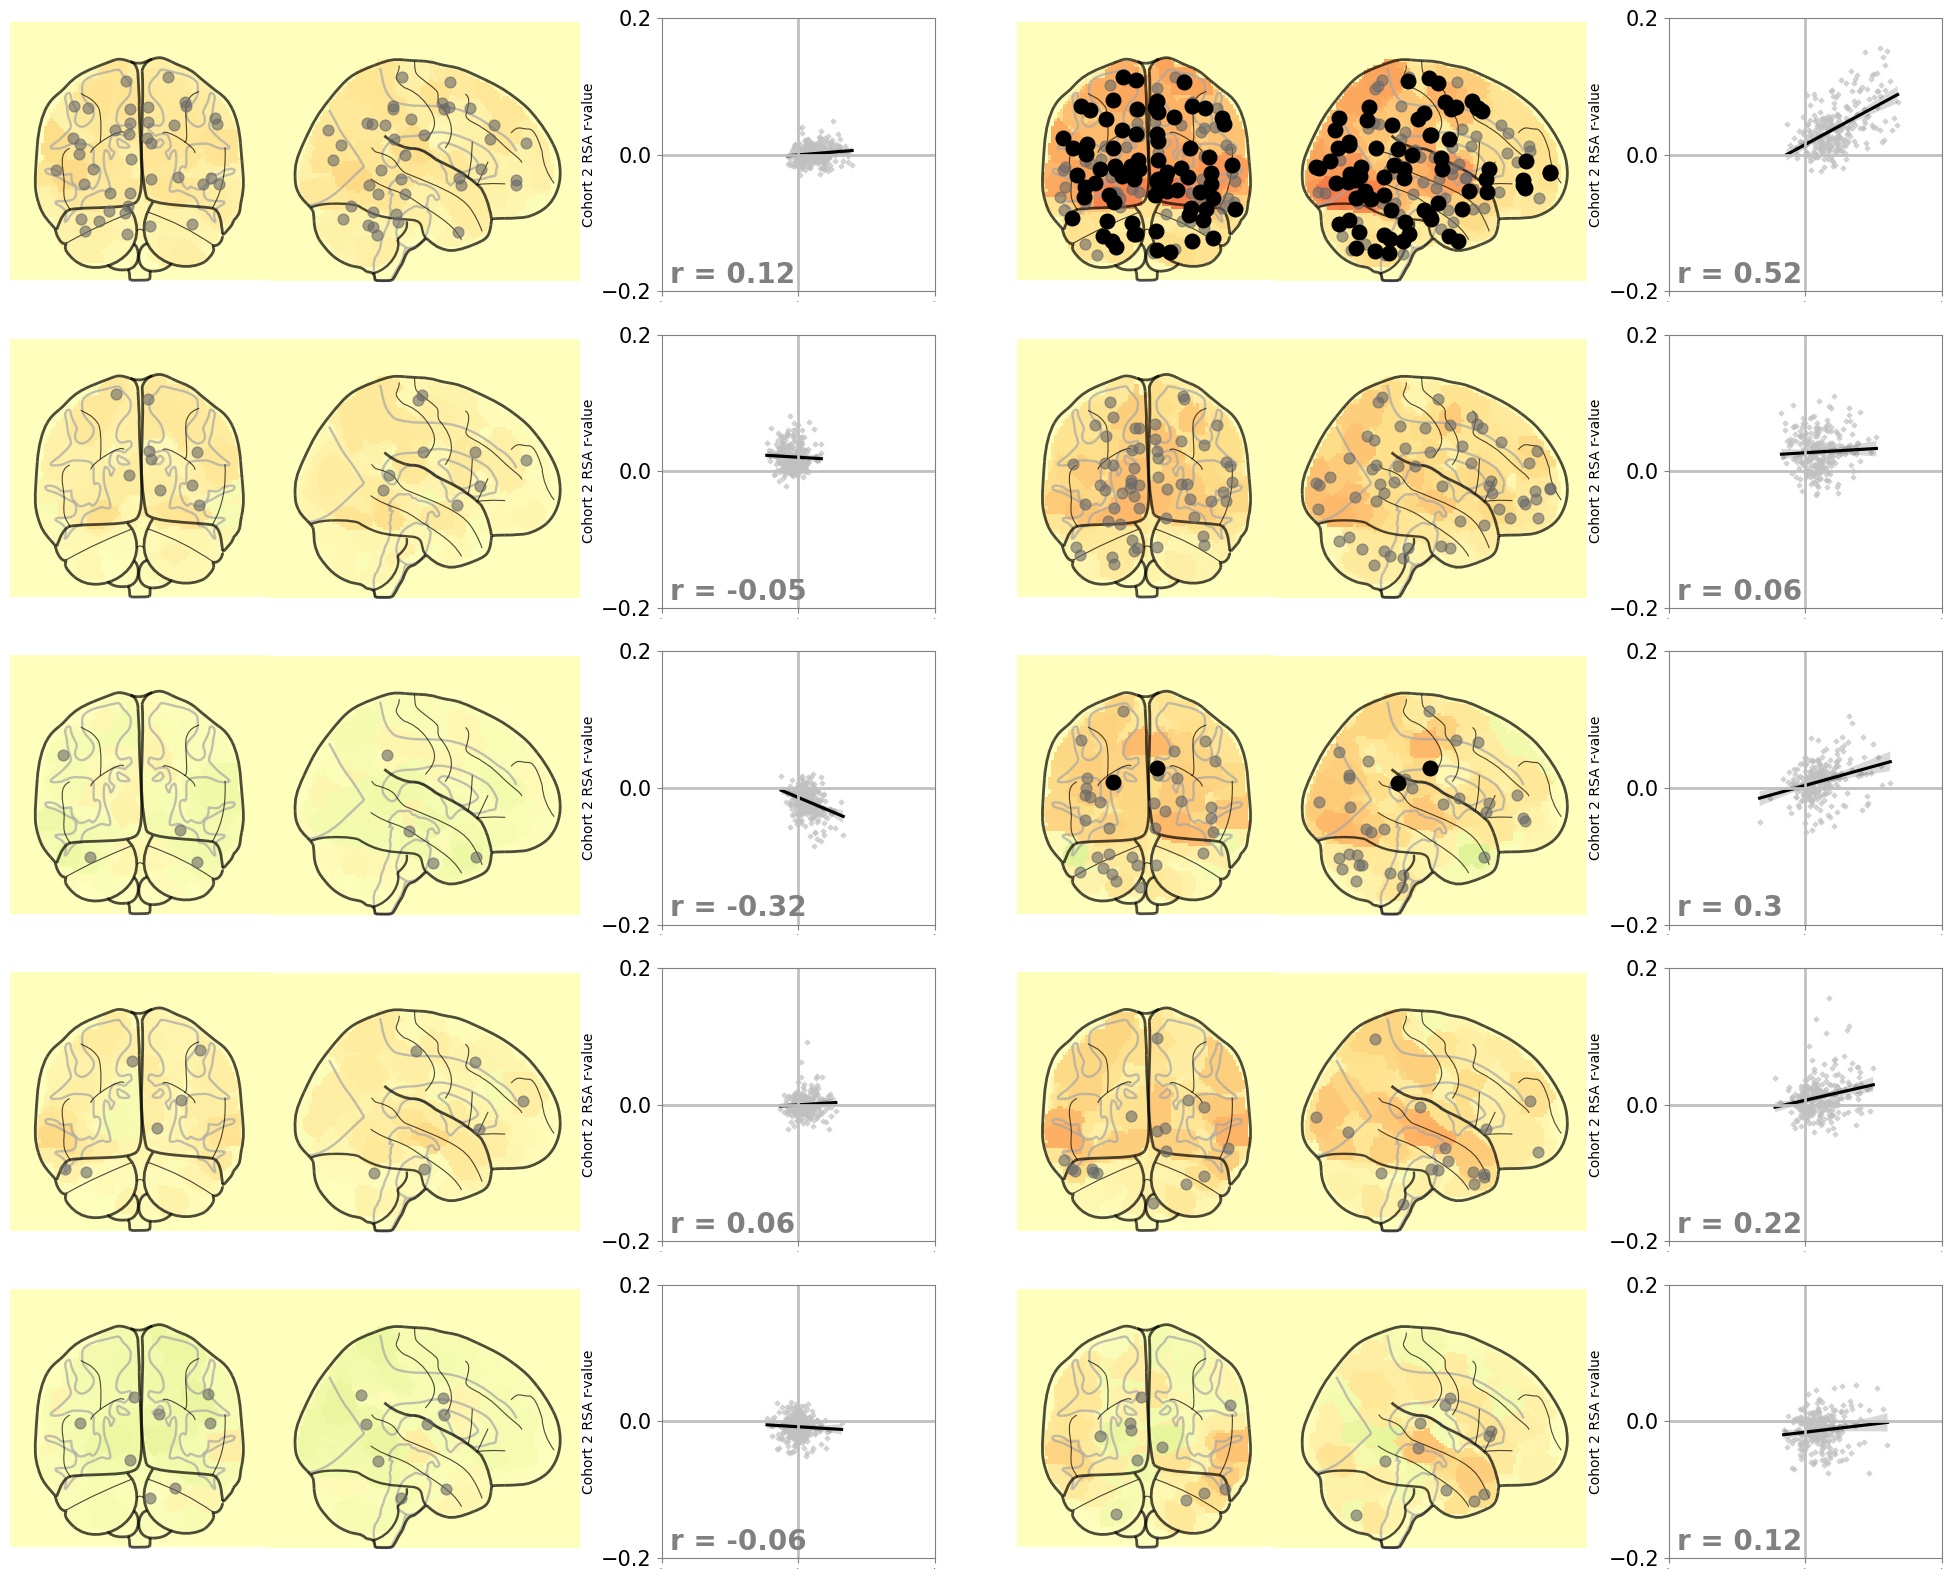

In [28]:
main_res = load_up_result_by_task(use_controls=True,
                            ds='hbn',
                            run='movieDM',
                            run_split_half_opts=[False], 
                            tasks=hbn_tasks,
                            n_perms=10000)
split_res = load_up_result_by_task(use_controls=True,
                            ds='hbn',
                            run='movieDM',
                            run_split_half_opts=[True], 
                            tasks=hbn_tasks,
                            n_perms=2)


df = pd.concat([main_res, split_res])

f = create_figure_for_dataset(ds='hbn',
                             run='movieDM',
                             df=df,
                             tasks=hbn_tasks)
